## Reguralisation
It avoids overfitting by adding a penalty to the model with high variance, thereby shrinking the beta coefficients to zero.
It minimizes the validation loss and tries to improve the accuracy of the model.
It is one of the ways to improve our model to work on unseen data by ignoring the less important features.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import seaborn as sns

## Generating Synthetic Data
We are using np.random.uniform function to generate uniform distribution.

In [3]:
# y = ax + b + e
# where epsilon is standard gaussian.
# x is distributed as uniform rv between [0,10].

n = 100
x = np.random.uniform(0, 10, n)

# a be any real number
a = np.random.uniform(0, 4, 1)
b = np.random.uniform(0, 4, 1)
e = np.random.normal(0, 1, n)

y = a * x + b + e

## Visualizing the Data


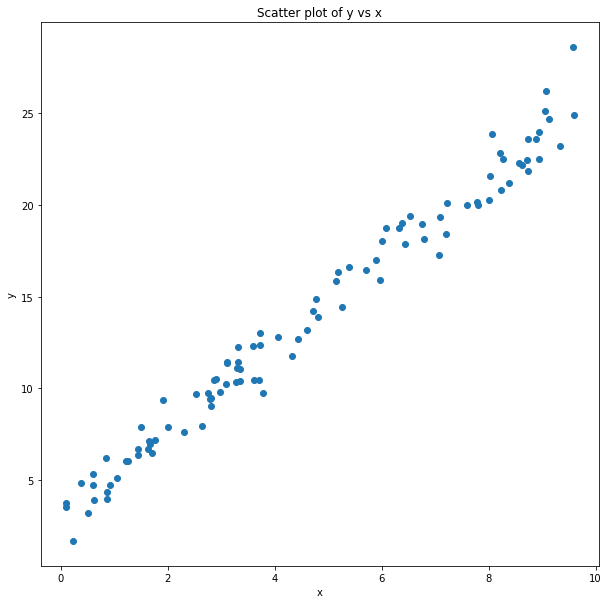

In [4]:
# plot the data
# figure size (width, height)
fig = plt.figure(figsize=(10, 10))


plt.grid(False)
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatter plot of y vs x")
plt.show()

In [5]:
# normalise the data
x_norm = (x - x.mean()) / x.std()
y_norm = (y - y.mean()) / y.std()


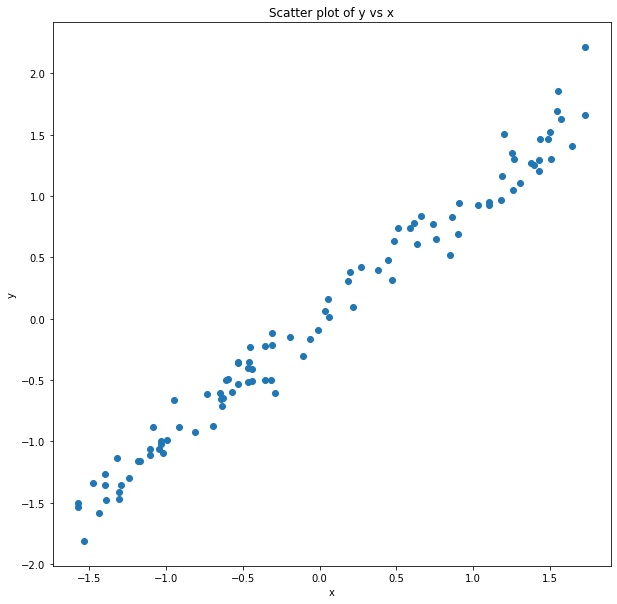

In [6]:
# plot the data
# figure size (width, height)
fig = plt.figure(figsize=(10, 10))


plt.grid(False)
plt.scatter(x_norm, y_norm)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatter plot of y vs x")
plt.show()

## Hypothesis Function

In [7]:
def hypothesis(theta, x):
    '''
    This function calculates the hypothesis function

    Parameters
    ----------
    theta : array-like of shape (n,)
        The coefficients of the linear regression model.
    x : array-like of shape (n,)
        The input data.
    
    Returns
    -------
    float
        The output of the hypothesis function.

    '''
    #calculate the hypothesis function using theta and x
    #H(x) = transpose(theta) * x
    #if the length of x is one less than the length of theta then add a column of ones to x to the front
    if len(x) == len(theta) - 1:
        #print(len(x), len(theta))
        x = np.insert(x, 0, 1)
    return np.dot(theta, x)

## Cost Function

In [8]:
def cost_function(theta, x, y):
    '''
    This function calculates the cost function

    Parameters
    ----------
    theta : array-like of shape (n,)
        The coefficients of the linear regression model.
    x : array-like of shape (n,m)
        The input data.
    y : array-like of shape (n,)
        The target data.
    
    Returns
    -------
    float
        The output of the cost function.

    '''
    cost=0
    
    
    for i in range(len(y)):
        cost += (hypothesis(theta, x[i]) - y[i])**2

   # print("cost = ",cost/2*(len(y)))
    return cost/2*(len(y))

## Batch Gradient Descent

In [9]:
def batch_gradient_descent(theta, x, y, alpha, iterations,epsilon):
    '''
    This function calculates the gradient descent

    Parameters
    ----------
    theta : array-like of shape (n,)
        The coefficients of the linear regression model.
    x : array-like of shape (n,m)
        The input data.
    y : array-like of shape (n,)
        The target data.
    alpha : float
        The learning rate.
    iterations : int
        The number of iterations.
    
    Returns
    -------
    array-like of shape (n,)
        The output of the gradient descent.

    '''
    #calculate the gradient descent
    #store all the values of theta in a list and corresponding cost in another list
    theta_list = []
    cost_list = []
    #repeat until convergence
    print(theta,"cost is",cost_function(theta, x, y))
    theta_list.append(theta)
    cost_list.append(cost_function(theta, x, y))
    for i in range(iterations):
        # if i > 0 and i%100 == 0:
        #     print(i)
        temp_theta = theta.copy()
        for j in range(len(theta)):
            temp=0
            for k in range(len(y)):
                temp+=(hypothesis(theta, x[k]) - y[k])*x[k][j]
            # theta[j] = theta[j] - alpha*(1/(len(y)))*temp
            temp_theta[j] = temp_theta[j] - alpha*(1/(len(y)))*temp
        theta = temp_theta.copy()
        #compare current loss with previous loss if loss is not decreasing then break
        print(theta,"cost is",cost_function(theta, x, y))
        theta_list.append(theta)
        cost_list.append(cost_function(theta, x, y))
        if i>0:
            if cost_list[i-1]-cost_list[i] < epsilon:
                break
        

    return theta, theta_list, cost_list

## Predicting for test data


In [10]:
def predict_batch(theta, x):
    '''
    This function calculates the predicted values

    Parameters
    ----------
    theta : array-like of shape (n,)
        The coefficients of the linear regression model.
    x : array-like of shape (n,m)
        The input data.
    
    Returns
    -------
    array-like of shape (n,)
        The output of the predicted values.

    '''
    #calculate the predicted values
    y_pred = []
    for i in range(len(x)):
        y_pred.append(hypothesis(theta, x[i]))
    return y_pred

In [11]:
def augment (X, d, aug_intercept = False):
    if aug_intercept:
        X = np.c_[np.ones(len(X)), X]
    for i in range(2,d+1):
        X = np.c_[X, np.power(X[:,1],i)]

    return X

In [12]:
X_aug_2 = augment(x_norm, 2, aug_intercept = True)
X_aug_5 = augment(x_norm, 5, aug_intercept = True)
X_aug_10 = augment(x_norm, 10, aug_intercept = True)

In [13]:
# normalise each feature
for i in range(1,len(X_aug_2[0])):
    X_aug_2[:,i] = (X_aug_2[:,i] - X_aug_2[:,i].mean()) / X_aug_2[:,i].std()
for i in range(1,len(X_aug_5[0])):
    X_aug_5[:,i] = (X_aug_5[:,i] - X_aug_5[:,i].mean()) / X_aug_5[:,i].std()
for i in range(1,len(X_aug_10[0])):
    X_aug_10[:,i] = (X_aug_10[:,i] - X_aug_10[:,i].mean()) / X_aug_10[:,i].std()


In [14]:
print(X_aug_2[0])
print(X_aug_5[0])
print(X_aug_10[0])

[ 1.          0.74106909 -0.53238799]
[ 1.          0.74106909 -0.53238799  0.12496024 -0.65276355 -0.08072549]
[ 1.          0.74106909 -0.53238799  0.12496024 -0.65276355 -0.08072549
 -0.59406748 -0.14363743 -0.50891856 -0.16453059 -0.43445669]


In [15]:
theta02 = np.zeros(len(X_aug_2[0]))
theta05 = np.zeros(len(X_aug_5[0]))
theta10 = np.zeros(len(X_aug_10[0]))


In [16]:
theta2, theta_list2, cost_list2 = batch_gradient_descent(theta02, X_aug_2, y_norm, alpha = 0.01, iterations = 1000, epsilon = 0.0001)

[0. 0. 0.] cost is 4999.999999999999
[-6.66133815e-19  9.89114204e-03  1.97239828e-03] cost is 4898.823900948081
[-1.31006317e-18  1.96792961e-02  3.90462963e-03] cost is 4799.819219186459
[-2.06501483e-18  2.93655751e-02  5.79730858e-03] cost is 4702.937906058586
[-2.45359288e-18  3.89510796e-02  7.65104120e-03] cost is 4608.133001663799
[-2.83106871e-18  4.84368977e-02  9.46642523e-03] cost is 4515.358609749054
[-3.58602037e-18  5.78241057e-02  1.12440502e-02] cost is 4424.56987318704
[-4.09672296e-18  6.71137675e-02  1.29844975e-02] cost is 4335.722950026831
[-4.54081217e-18  7.63069356e-02  1.46883405e-02] cost is 4248.774990103559
[-5.01820807e-18  8.54046505e-02  1.63561447e-02] cost is 4163.684112194031
[-5.46229728e-18  9.44079413e-02  1.79884678e-02] cost is 4080.409381705315
[-6.07291994e-18  1.03317825e-01  1.95858597e-02] cost is 3998.9107888838744
[-6.69464484e-18  1.12135309e-01  2.11488628e-02] cost is 3919.1492275328746
[-7.20534743e-18  1.20861388e-01  2.26780120e-02] 

In [17]:
# get axis to plot based on min x and max x


## Visualizing the linear regression model with the polynomial of degree 2

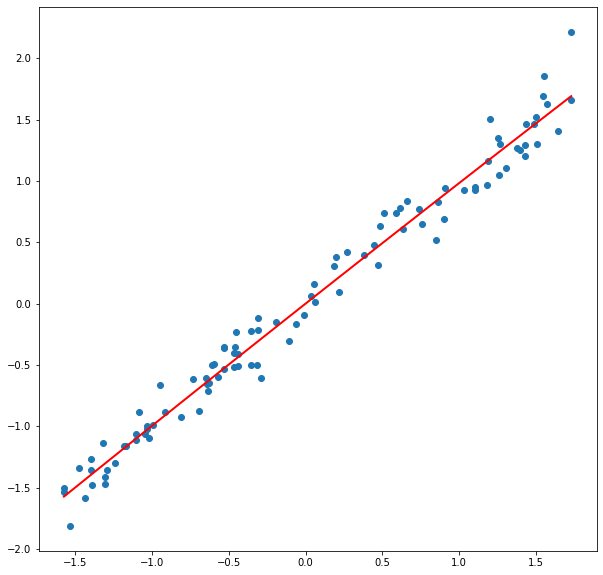

In [18]:
# plot the data
# figure size (width, height)
fig = plt.figure(figsize=(10, 10))
plt.grid(False)
plt.scatter(x_norm, y_norm)

# plot the line
x = np.linspace(min(x_norm), max(x_norm), 100)
x_aug = augment(x, 2, aug_intercept = True)
y_pred = predict_batch(theta2, x_aug)
plt.plot(x, y_pred, color='red', linewidth=2)





In [19]:
theta5 , theta_list5, cost_list5 = batch_gradient_descent(theta05, X_aug_5, y_norm, alpha = 0.01, iterations = 1000, epsilon = 0.0001)

[0. 0. 0. 0. 0. 0.] cost is 4999.999999999999
[-6.66133815e-19  9.89114204e-03  1.97239828e-03  9.22787172e-03
  2.56914849e-03  8.37798602e-03] cost is 4740.341832588776
[-1.21014310e-18  1.95176228e-02  3.83277635e-03  1.81773174e-02
  5.00590257e-03  1.64844073e-02] cost is 4496.231548534764
[-1.97619698e-18  2.88874966e-02  5.58555039e-03  2.68569141e-02
  7.31529420e-03  2.43277309e-02] cost is 4266.71070371045
[-2.63122857e-18  3.80085654e-02  7.23498164e-03  3.52749691e-02
  9.50218139e-03  3.19161565e-02] cost is 4050.880712050638
[-3.19744231e-18  4.68883867e-02  8.78518163e-03  4.34395288e-02
  1.15712540e-02  3.92576246e-02] cost is 3847.8990828184287
[-3.73034936e-18  5.55342813e-02  1.02401171e-02  5.13583863e-02
  1.35270393e-02  4.63598249e-02] cost is 3656.975895170558
[-4.39648318e-18  6.39533409e-02  1.16036150e-02  5.90390902e-02
  1.53739076e-02  5.32302045e-02] cost is 3477.370495032547
[-4.91828800e-18  7.21524353e-02  1.28793671e-02  6.64889520e-02
  1.71160770e-

## Visualizing the linear regression model with the polynomial of degree 5


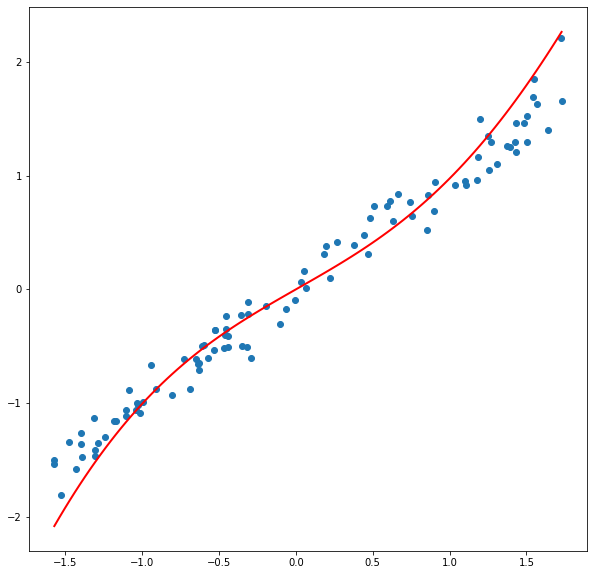

In [20]:
# plot the data
# figure size (width, height)
fig = plt.figure(figsize=(10, 10))
plt.grid(False)
plt.scatter(x_norm, y_norm)
x = np.linspace(min(x_norm), max(x_norm), 100)
x_aug = augment(x, 5, aug_intercept = True)
y_pred = predict_batch(theta5, x_aug)
plt.plot(x, y_pred, color='red', linewidth=2)
plt.show()


In [21]:
theta10 , theta_list10, cost_list10 = batch_gradient_descent(theta10, X_aug_10, y_norm, alpha = 0.1, iterations = 10000, epsilon = 0.000001)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] cost is 4999.999999999999
[-6.66133815e-18  9.89114204e-02  1.97239828e-02  9.22787172e-02
  2.56914849e-02  8.37798602e-02  2.92508283e-02  7.56429694e-02
  3.12470554e-02  6.81075583e-02  3.22231040e-02] cost is 2164.079723560411
[-1.34336986e-17  1.58433740e-01  1.58626959e-02  1.40241491e-01
  2.29903478e-02  1.21946012e-01  2.72938839e-02  1.05851775e-01
  2.97334066e-02  9.18200553e-02  3.09718877e-02] cost is 1455.8191104705359
[-1.89848137e-17  2.00859563e-01  7.66719697e-03  1.69764573e-01
  1.43552835e-02  1.41916701e-01  1.82660344e-02  1.18624563e-01
  2.03666623e-02  9.90854619e-02  2.13543679e-02] cost is 1134.6289299930706
[-2.49800181e-17  2.34446691e-01  5.10676906e-04  1.90281165e-01
  6.24031765e-03  1.53506524e-01  9.25220551e-03  1.23819785e-01
  1.05779727e-02  9.96030638e-02  1.09588197e-02] cost is 945.1751793734082
[-3.10862447e-17  2.62622536e-01 -4.53151629e-03  2.05602844e-01
  9.66907470e-05  1.60558280e-01  1.96967593e-03

## Visualizing the linear regression model with the polynomial of degree 10

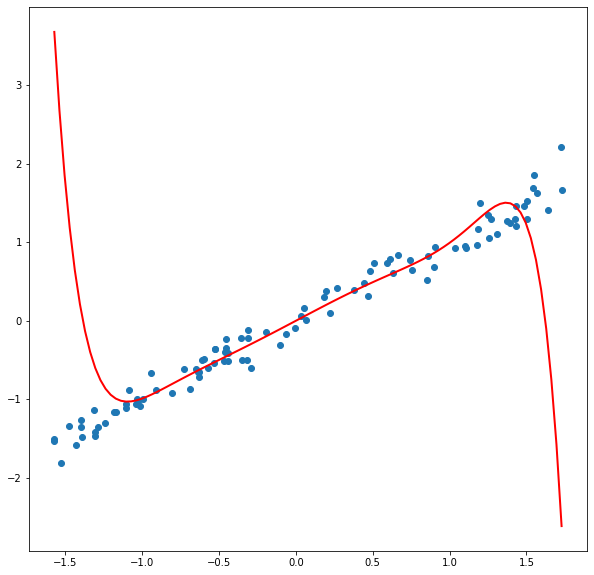

In [22]:
# plot the data
# figure size (width, height)
fig = plt.figure(figsize=(10, 10))
plt.grid(False)
plt.scatter(x_norm, y_norm)
x = np.linspace(min(x_norm), max(x_norm), 100)
x_aug = augment(x, 10, aug_intercept = True)
y_pred = predict_batch(theta10, x_aug)
plt.plot(x, y_pred, color='red', linewidth=2)
plt.show()

In [23]:
n = 10000
x = np.random.uniform(0, 10, n)

# a be any real number
a = np.random.uniform(0, 20, 1)
b = np.random.uniform(0, 20, 1)
e = np.random.normal(0, 1, n)

y = a * x + b + e

In [24]:
x_norm = (x - x.mean()) / x.std()
y_norm = (y - y.mean()) / y.std()

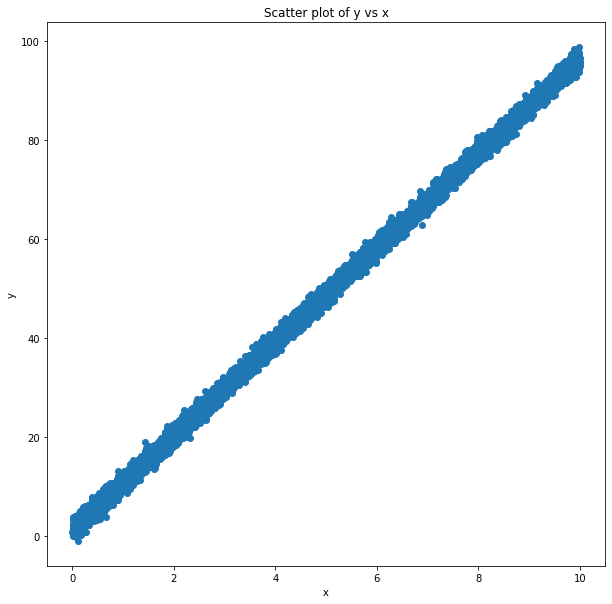

In [25]:
# plot the data
# figure size (width, height)
fig = plt.figure(figsize=(10, 10))


plt.grid(False)
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatter plot of y vs x")
plt.show()

In [26]:
X_aug_large_10 = augment(x_norm, 10, aug_intercept = True)

for i in range(1,len(X_aug_10[0])):
    X_aug_large_10[:,i] = (X_aug_large_10[:,i] - X_aug_large_10[:,i].mean()) / X_aug_large_10[:,i].std()


In [27]:
theta10 , theta_list10, cost_list10 = batch_gradient_descent(theta10, X_aug_large_10, y_norm, alpha = 0.3, iterations = 1000, epsilon = 0.00000001)

[-1.09412479e-16  1.03471194e+00  1.39763545e-02 -2.30969660e-01
 -1.40544985e-01  1.71588926e-01  6.38064463e-02  1.37210822e-01
  7.00233327e-02 -1.21626149e-01 -6.23369383e-03] cost is 133189.79161277108
[-1.19507321e-16  1.03976726e+00  1.68192482e-02 -2.27442660e-01
 -1.39466773e-01  1.73629275e-01  6.34757324e-02  1.38258162e-01
  6.86708893e-02 -1.21222584e-01 -8.32032442e-03] cost is 120462.7612304342
[-9.93788385e-17  1.04150945e+00  1.94085903e-02 -2.27369139e-01
 -1.38486701e-01  1.72342436e-01  6.31609421e-02  1.36134053e-01
  6.74157351e-02 -1.23843019e-01 -1.02506323e-02] cost is 112052.52557103761
[-1.09955794e-16  1.04404455e+00  2.18011036e-02 -2.26131384e-01
 -1.37563924e-01  1.72371776e-01  6.28846658e-02  1.35389888e-01
  6.62630498e-02 -1.25061097e-01 -1.20352414e-02] cost is 105451.11032821446
[-1.19955296e-16  1.04588850e+00  2.39951153e-02 -2.25442610e-01
 -1.36709758e-01  1.71971240e-01  6.26316757e-02  1.34299904e-01
  6.51968782e-02 -1.26564729e-01 -1.3689148

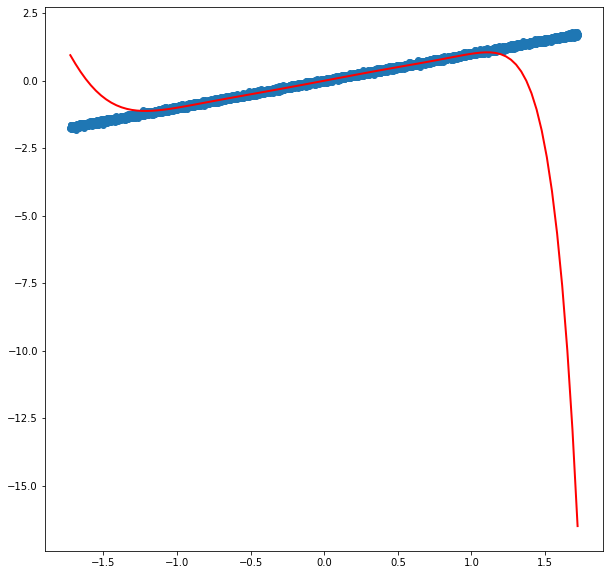

In [28]:
# plot the data
# figure size (width, height)
fig = plt.figure(figsize=(10, 10))
plt.grid(False)
plt.scatter(x_norm, y_norm)
x = np.linspace(min(x_norm), max(x_norm), 100)
x_aug = augment(x, 10, aug_intercept = True)
y_pred = predict_batch(theta10, x_aug)
plt.plot(x, y_pred, color='red', linewidth=2)
plt.show()

In [29]:
X_aug_large_5 = augment(x_norm, 5, aug_intercept = True)

for i in range(1,len(X_aug_5[0])):
    X_aug_large_5[:,i] = (X_aug_large_5[:,i] - X_aug_large_5[:,i].mean()) / X_aug_large_5[:,i].std()


In [30]:
theta5 , theta_list5, cost_list5 = batch_gradient_descent(theta5, X_aug_large_5, y_norm, alpha = 0.3, iterations = 1000, epsilon = 0.00000001)

[-7.20479232e-17  7.70455169e-01 -5.98998615e-03  2.30429474e-01
 -9.49268142e-03 -1.00151884e-02] cost is 482298.66424374725
[-8.12176715e-17  7.78211819e-01 -1.53070610e-03  2.27250052e-01
 -4.84444564e-03 -1.79246473e-02] cost is 430034.4246498802
[-8.94331831e-17  7.86453412e-01  2.57381786e-04  2.25190171e-01
 -2.87503151e-03 -2.44555617e-02] cost is 391165.6487011963
[-9.35836131e-17  7.94395086e-01  9.41765267e-04  2.23385701e-01
 -2.01633863e-03 -3.04628533e-02] cost is 357682.822087786
[-9.89784643e-17  8.01930995e-01  1.17240171e-03  2.21692869e-01
 -1.61802186e-03 -3.61018508e-02] cost is 327985.2258574651
[-1.02581416e-16  8.09062772e-01  1.21780002e-03  2.20083525e-01
 -1.41123669e-03 -4.14145360e-02] cost is 301495.92035610456
[-1.06957915e-16  8.15808770e-01  1.18868439e-03  2.18548935e-01
 -1.28494675e-03 -4.64230614e-02] cost is 277842.44704613334
[-1.10569609e-16  8.22189336e-01  1.13063802e-03  2.17084063e-01
 -1.19327448e-03 -5.11451560e-02] cost is 256716.424039221

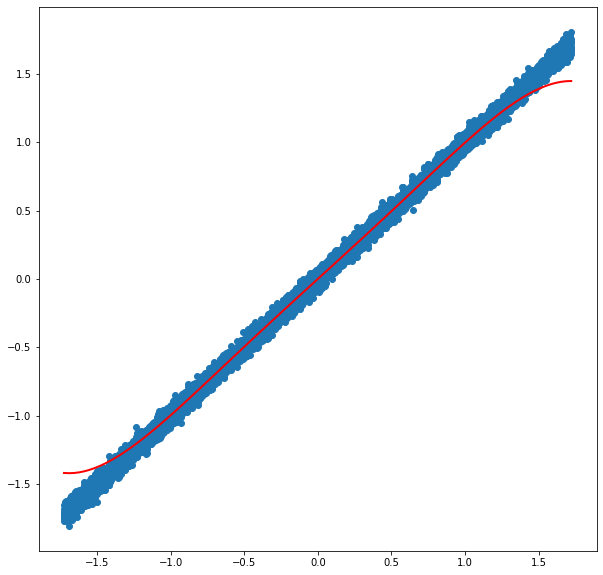

In [31]:
# plot the data
# figure size (width, height)
fig = plt.figure(figsize=(10, 10))
plt.grid(False)
plt.scatter(x_norm, y_norm)
x = np.linspace(min(x_norm), max(x_norm), 100)
x_aug = augment(x, 5, aug_intercept = True)
y_pred = predict_batch(theta5, x_aug)
plt.plot(x, y_pred, color='red', linewidth=2)
plt.show()